In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create some sample data (replace this with your dataset)
#data = np.random.rand(100, 3)  # 100 samples with 3 features
#np.set_printoptions(precision=4, suppress=True)
df=pd.read_csv("/content/drive/MyDrive/Iris.csv")
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data = pd.DataFrame(df, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
print("Formatted Array:")
print(data)

Formatted Array:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Step 2: Standardize the data
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)
standardized_data = (data - mean)/ std_dev
print (mean, std_dev)
print(standardized_data)

SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64 SepalLengthCm    0.825301
SepalWidthCm     0.432147
PetalLengthCm    1.758529
PetalWidthCm     0.760613
dtype: float64
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0        -0.900681      1.032057      -1.341272     -1.312977
1        -1.143017     -0.124958      -1.341272     -1.312977
2        -1.385353      0.337848      -1.398138     -1.312977
3        -1.506521      0.106445      -1.284407     -1.312977
4        -1.021849      1.263460      -1.341272     -1.312977
..             ...           ...            ...           ...
145       1.038005     -0.124958       0.819624      1.447956
146       0.553333     -1.281972       0.705893      0.922064
147       0.795669     -0.124958       0.819624      1.053537
148       0.432165      0.800654       0.933356      1.447956
149       0.068662     -0.124958       0.762759      0.790591

[150 rows x 4 col

In [9]:
# Step 3: Compute the covariance matrix
covariance_matrix = np.cov(standardized_data, rowvar=False)
size_cc = covariance_matrix.size
shape_cc = covariance_matrix.shape
print (size_cc, shape_cc)
print(covariance_matrix)

16 (4, 4)
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [10]:
# Step 4: Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
print(eigenvalues)
print(eigenvectors)

[0.02074601 0.14834223 0.92740362 2.93035378]
[[ 0.26199559  0.72101681  0.37231836 -0.52237162]
 [-0.12413481 -0.24203288  0.92555649  0.26335492]
 [-0.80115427 -0.14089226  0.02109478 -0.58125401]
 [ 0.52354627 -0.6338014   0.06541577 -0.56561105]]


In [11]:
# Step 5: Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
print(eigenvalues)
print(eigenvectors)

[2.93035378 0.92740362 0.14834223 0.02074601]
[[-0.52237162  0.37231836  0.72101681  0.26199559]
 [ 0.26335492  0.92555649 -0.24203288 -0.12413481]
 [-0.58125401  0.02109478 -0.14089226 -0.80115427]
 [-0.56561105  0.06541577 -0.6338014   0.52354627]]


In [12]:
# Step 6: Choose the number of components (or a threshold for explained variance)
n_components = 2  # Choose the number of principal components


In [13]:
# Step 7: Select the top 'n_components' eigenvectors
selected_eigenvectors = eigenvectors[:, :n_components]



In [14]:
# Step 8: Project the data onto the selected eigenvectors to obtain the principal components
final_result = np.dot(standardized_data, selected_eigenvectors)



In [15]:
# Step 9: Print the final result
print("Final Result after PCA:")
print(final_result)



Final Result after PCA:
[[ 2.26454173e+00  5.05703903e-01]
 [ 2.08642550e+00 -6.55404729e-01]
 [ 2.36795045e+00 -3.18477311e-01]
 [ 2.30419716e+00 -5.75367713e-01]
 [ 2.38877749e+00  6.74767397e-01]
 [ 2.07053681e+00  1.51854856e+00]
 [ 2.44571134e+00  7.45626750e-02]
 [ 2.23384186e+00  2.47613932e-01]
 [ 2.34195768e+00 -1.09514636e+00]
 [ 2.18867576e+00 -4.48629048e-01]
 [ 2.16348656e+00  1.07059558e+00]
 [ 2.32737775e+00  1.58587455e-01]
 [ 2.22408272e+00 -7.09118158e-01]
 [ 2.63971626e+00 -9.38281982e-01]
 [ 2.19229151e+00  1.88997851e+00]
 [ 2.25146521e+00  2.72237108e+00]
 [ 2.20275048e+00  1.51375028e+00]
 [ 2.19017916e+00  5.14304308e-01]
 [ 1.89407429e+00  1.43111071e+00]
 [ 2.33994907e+00  1.15803343e+00]
 [ 1.91455639e+00  4.30465163e-01]
 [ 2.20464540e+00  9.52457317e-01]
 [ 2.77416979e+00  4.89517027e-01]
 [ 1.82041156e+00  1.06750793e-01]
 [ 2.22821750e+00  1.62186163e-01]
 [ 1.95702401e+00 -6.07892567e-01]
 [ 2.05206331e+00  2.66014312e-01]
 [ 2.16819365e+00  5.52016495e-

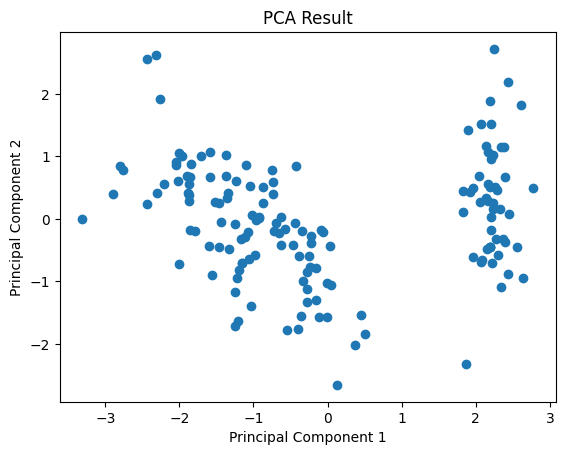

In [16]:
# Step 10: Visualize the results (for 2D data)
if n_components == 2:
    plt.scatter(final_result[:, 0], final_result[:, 1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Result')
    plt.show()


In [18]:
from sklearn.decomposition import PCA
#data = np.random.rand(100, 3)  # 100 samples with 3 features

from sklearn.preprocessing import StandardScaler
df=pd.read_csv("/content/drive/MyDrive/Iris.csv")
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
data = pd.DataFrame(df, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
print("Formatted Array:")
print(data)

Formatted Array:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


PCA Results:
[[-2.26454173e+00  5.05703903e-01]
 [-2.08642550e+00 -6.55404729e-01]
 [-2.36795045e+00 -3.18477311e-01]
 [-2.30419716e+00 -5.75367713e-01]
 [-2.38877749e+00  6.74767397e-01]
 [-2.07053681e+00  1.51854856e+00]
 [-2.44571134e+00  7.45626750e-02]
 [-2.23384186e+00  2.47613932e-01]
 [-2.34195768e+00 -1.09514636e+00]
 [-2.18867576e+00 -4.48629048e-01]
 [-2.16348656e+00  1.07059558e+00]
 [-2.32737775e+00  1.58587455e-01]
 [-2.22408272e+00 -7.09118158e-01]
 [-2.63971626e+00 -9.38281982e-01]
 [-2.19229151e+00  1.88997851e+00]
 [-2.25146521e+00  2.72237108e+00]
 [-2.20275048e+00  1.51375028e+00]
 [-2.19017916e+00  5.14304308e-01]
 [-1.89407429e+00  1.43111071e+00]
 [-2.33994907e+00  1.15803343e+00]
 [-1.91455639e+00  4.30465163e-01]
 [-2.20464540e+00  9.52457317e-01]
 [-2.77416979e+00  4.89517027e-01]
 [-1.82041156e+00  1.06750793e-01]
 [-2.22821750e+00  1.62186163e-01]
 [-1.95702401e+00 -6.07892567e-01]
 [-2.05206331e+00  2.66014312e-01]
 [-2.16819365e+00  5.52016495e-01]
 [-2.14

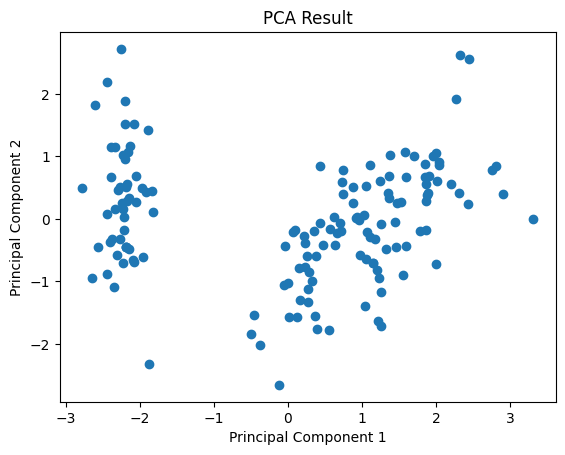

In [20]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)

print("PCA Results:")
print(pca_data)

if n_components == 2:
    plt.scatter(pca_data[:, 0], pca_data[:, 1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Result')
    plt.show()